In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from Code.Evaluation_functions import archetype_correlation,NMI,Ordinal_reconstuction
import os
import itertools
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
all_types=[0,10,9,20,5,14,2,7,18,11,17,6,15,8,19,4,13,1,16,3,12]

In [3]:
def radarplot():
    pass

SyntaxError: unexpected EOF while parsing (<ipython-input-3-1945fbba0456>, line 1)

In [21]:
#ESS8 dat
filePath=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\RealData"
model=None
interval=None
distination=None
K=20
start=2

In [122]:
#Load model data 

#Was saved wrong thus the switch
intermodel_ACC=pd.read_csv(os.path.join(filePath,f"K{k}intermodel_NMI"),index_col=0)
intermodel_NMI=pd.read_csv(os.path.join(filePath, f"K{k}intermodel_ACC"),index_col=0)

intermodel_RBC=pd.read_csv(os.path.join(filePath, f"K{k}intermodel_RBC"),index_col=0)
run_loss_OAA=pd.read_csv(os.path.join(filePath,f"K{k}OAA_loss"),index_col=0)
run_loss_RB_OAA=pd.read_csv(os.path.join(filePath, f"K{k}_OAA_loss"),index_col=0)

In [101]:
#Refind sigma
times=3
Klist=np.arange(start,K)
OAA_noise=pd.DataFrame()
RB_OAA_noise=pd.DataFrame()
loss_log_OAA=pd.DataFrame()
loss_log_RB_OAA=pd.DataFrame()
for k in Klist:
    #OAA
    Summerys=[]
    sumfiles=[f"K{k}_sample{i}OAA_summery" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            Summerys.append(json.load(file))
    OAA_noise.loc[:,k]=[Summerys[i]["Sigma"] for i in range(times)]
    loss_log_OAA.loc[:,k]=[Summerys[i]["loss"] for i in range(times)]
    #RB-OAA
    Summerys=[]
    sumfiles=[f"K{k}_sample{i}RB_summery" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            Summerys.append(json.load(file))
    RB_OAA_noise.loc[:,k]=[Summerys[i]["Sigma"] for i in range(times)]
    loss_log_RB_OAA.loc[:,k]=[Summerys[i]["loss"] for i in range(times)]


In [102]:
OAA_noise=OAA_noise.transpose()
RB_OAA_noise=RB_OAA_noise.transpose()

loss_log_OAA=loss_log_OAA.transpose()
loss_log_RB_OAA=loss_log_RB_OAA.transpose()

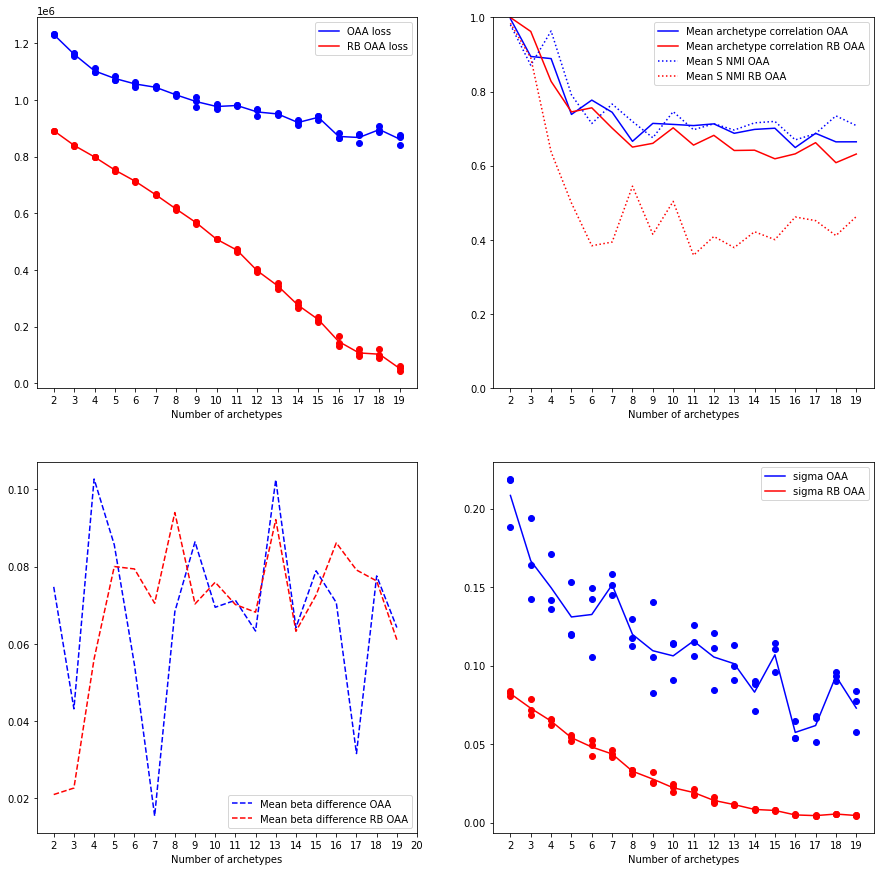

'\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))\nrun_loss_OAA.plot(ax=ax1, ylabel="loss", xlabel="Epokes", title="Ordinal Archetype analysis (Initialising model)")\nrun_loss_RB_OAA.plot(ax=ax2, ylabel="loss", xlabel="Epokes", title="Respons bias OAA")\nplt.show()\n'

In [129]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))

loss_log_OAA.mean(1).plot(c="blue", ax=ax1,xlabel="Number of archetypes", legend=True,xticks=np.arange(2,21))
loss_log_RB_OAA.mean(1).plot(c="red", ax=ax1, legend=True)
ax1.legend(["OAA loss","RB OAA loss"])

loss_log_OAA.plot(style="o", c="blue", ax=ax1, legend=False)
loss_log_RB_OAA.plot(style="o", c="red", ax=ax1, legend=False)

intermodel_ACC.plot(ax=ax2,ylim=(0,1),color=["blue","red"],xlabel="Number of archetypes",xticks=np.arange(2,21))
intermodel_NMI.plot(ax=ax2,ylim=(0,1),color=["blue","red"],style=":")
ax2.legend(["Mean archetype correlation OAA","Mean archetype correlation RB OAA","Mean S NMI OAA","Mean S NMI RB OAA"])

intermodel_RBC.plot(ax=ax3, color=["blue", "red"],xlabel="Number of archetypes", style="--",xticks=np.arange(2,21))

OAA_noise.mean(1).plot(c="blue", ax=ax4, legend=True,xlabel="Number of archetypes",xticks=np.arange(2,21))
RB_OAA_noise.mean(1).plot(c="red", ax=ax4, legend=True)
ax4.legend(["sigma OAA","sigma RB OAA"])

OAA_noise.plot(style="o", c="blue", ax=ax4, legend=False,xlabel="Number of archetypes")
RB_OAA_noise.plot(style="o", c="red", ax=ax4, legend=False)

plt.show()

"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
run_loss_OAA.plot(ax=ax1, ylabel="loss", xlabel="Epokes", title="Ordinal Archetype analysis (Initialising model)")
run_loss_RB_OAA.plot(ax=ax2, ylabel="loss", xlabel="Epokes", title="Respons bias OAA")
plt.show()
"""

In [203]:
#simulated data
filePath=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\SimulatedBiasFree"
model=None
interval=None
distination=None
sigma_list=np.arange(0,0.5,0.05).round(2)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [204]:
NMI_log_OAA=pd.read_csv(os.path.join(filePath, "OAA_NMI_log"),index_col=0)
NMI_log_RB_OAA=pd.read_csv(os.path.join(filePath, "RB_OAA_NMI_log"),index_col=0)
A_correlation_OAA=pd.read_csv(os.path.join(filePath, "OAA_Acor_log"),index_col=0)
A_correlation_RB_OAA=pd.read_csv(os.path.join(filePath, "RB_OAAAcor_log"),index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Andre\\OneDrive - Danmarks Tekniske Universitet\\Bachelor project\\NewScaleExperiment\\RB_OAA_NMI_log'

In [ ]:
#Refind sigma
times=3
OAA_noise=pd.DataFrame()
RB_OAA_noise=pd.DataFrame()
loss_log_OAA=pd.DataFrame()
loss_log_RB_OAA=pd.DataFrame()
for s in sigma_list:
    #OAA
    Summerys=[]
    sumfiles=[f"sigma{s}sample{i}OAA_summery" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            Summerys.append(json.load(file))
    OAA_noise.loc[:,s]=[Summerys[i]["Sigma"] for i in range(times)]
    loss_log_OAA.loc[:,s]=[Summerys[i]["loss"] for i in range(times)]
    #RB-OAA
    Summerys=[]
    sumfiles=[f"sigma{s}sample{i}RB_summery" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            Summerys.append(json.load(file))
    RB_OAA_noise.loc[:,s]=[Summerys[i]["Sigma"] for i in range(times)]
    loss_log_RB_OAA.loc[:,s]=[Summerys[i]["loss"] for i in range(times)]


In [199]:
OAA_noise=OAA_noise.transpose()
RB_OAA_noise=RB_OAA_noise.transpose()

loss_log_OAA=loss_log_OAA.transpose()
loss_log_RB_OAA=loss_log_RB_OAA.transpose()

In [200]:
#Refind beta because next time save all varibels 
from Code.Evaluation_functions import ResponsBiasCompereson
times=3
RBC_log_OAA=pd.DataFrame()
RBC_log_RB_OAA=pd.DataFrame()
for s in sigma_list:
    #open true
    with open(os.path.join(filePath,f"sigma{s}true"), "r") as file:
        true=json.load(file)
            
    #OAA
    result_OAA=[]
    sumfiles=[f"sigma{s}sample{i}OAA_result" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            result_OAA.append(json.load(file))
    RBC_log_OAA.loc[:,s]=[ResponsBiasCompereson(true["beta"], result_OAA[i]["beta"])[1] for i in range(times)]


    #RB-OAA
    result_RB_OAA=[]
    sumfiles=[f"sigma{s}sample{i}RB_result" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            result_RB_OAA.append(json.load(file))
    RBC_log_RB_OAA.loc[:,s]=[ResponsBiasCompereson(true["beta"], result_RB_OAA[i]["beta"])[1] for i in range(times)]


In [201]:
RBC_log_OAA=RBC_log_OAA.transpose()
RBC_log_RB_OAA=RBC_log_RB_OAA.transpose()

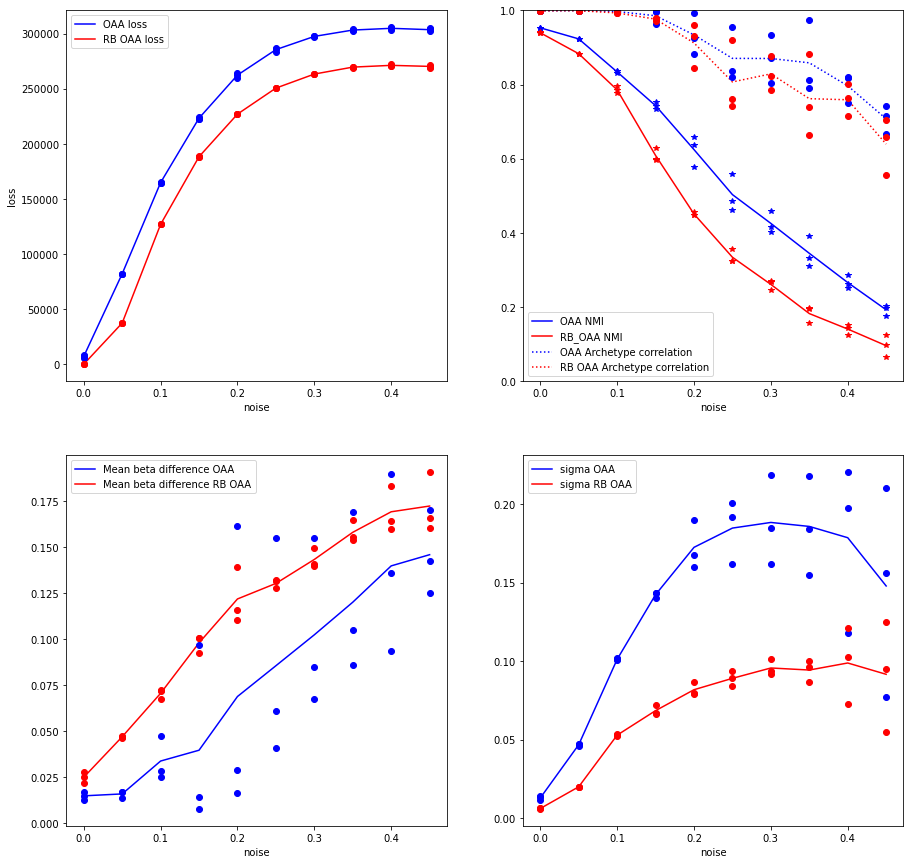

In [202]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(15,15))

loss_log_OAA.mean(1).plot(c="blue", ax=ax1, legend=True, ylabel="loss", xlabel="noise")
loss_log_RB_OAA.mean(1).plot(c="red", ax=ax1, legend=True)
ax1.legend(["OAA loss","RB OAA loss"])

loss_log_OAA.plot(style="o", c="blue", ax=ax1, legend=False)
loss_log_RB_OAA.plot(style="o", c="red", ax=ax1, legend=False)

NMI_log_OAA.mean(1).plot(c="blue", ax=ax2, xlabel="noise")
NMI_log_RB_OAA.mean(1).plot(c="red", ax=ax2)
A_correlation_OAA.mean(1).plot(style=":", c="blue", ax=ax2)
A_correlation_RB_OAA.mean(1).plot(style=":", c="red", ax=ax2)

ax2.legend(["OAA NMI","RB_OAA NMI","OAA Archetype correlation","RB OAA Archetype correlation"])

NMI_log_OAA.plot(style="*", c="blue", ax=ax2, ylim=(0, 1), legend=False)
NMI_log_RB_OAA.plot(style="*", c="red", ax=ax2, legend=False)
A_correlation_OAA.plot(style="o", c="blue", ax=ax2, legend=False)
A_correlation_RB_OAA.plot(style="o", c="red", ax=ax2, legend=False)

RBC_log_OAA.mean(1).plot(style="-", c="blue", ax=ax3, xlabel="noise")
RBC_log_RB_OAA.mean(1).plot(style="-", c="red", ax=ax3)

RBC_log_OAA.plot(style="o", c="blue", ax=ax3, legend=False)
RBC_log_RB_OAA.plot(style="o", c="red", ax=ax3, legend=False)
ax3.legend(["Mean beta difference OAA","Mean beta difference RB OAA"])

OAA_noise.mean(1).plot(c="blue", ax=ax4, legend=True)
RB_OAA_noise.mean(1).plot(c="red", ax=ax4, legend=True)
ax4.legend(["sigma OAA","sigma RB OAA"])

OAA_noise.plot(style="o", c="blue", ax=ax4, legend=False, xlabel="noise")
RB_OAA_noise.plot(style="o", c="red", ax=ax4, legend=False)

plt.show()


In [206]:
#simulated data
filePath=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\NewScaleExperiment"
model=None
interval=None
distination=None
sigma_list=np.arange(0,0.5,0.05).round(2)

In [205]:
NMI_log_OAA=pd.read_csv(os.path.join(filePath, "OAA_NMI_log"),index_col=0)
A_correlation_OAA=pd.read_csv(os.path.join(filePath, "OAA_Acor_log"),index_col=0)

In [207]:
#Refind beta because next time save all varibels 
from Code.Evaluation_functions import ResponsBiasCompereson
times=3
RBC_log_OAA=pd.DataFrame()
RBC_log_RB_OAA=pd.DataFrame()
for s in sigma_list:
    #open true
    with open(os.path.join(filePath,f"sigma{s}true"), "r") as file:
        true=json.load(file)
            
    #OAA
    result_OAA=[]
    sumfiles=[f"sigma{s}sample{i}OAA_result" for i in range(times)]
    for file in sumfiles:
        with open(os.path.join(filePath,file), "r") as file:
            result_OAA.append(json.load(file))
    RBC_log_OAA.loc[:,s]=[ResponsBiasCompereson(true["beta"], result_OAA[i]["beta"])[1] for i in range(times)]



In [208]:
RBC_log_OAA=RBC_log_OAA.transpose()

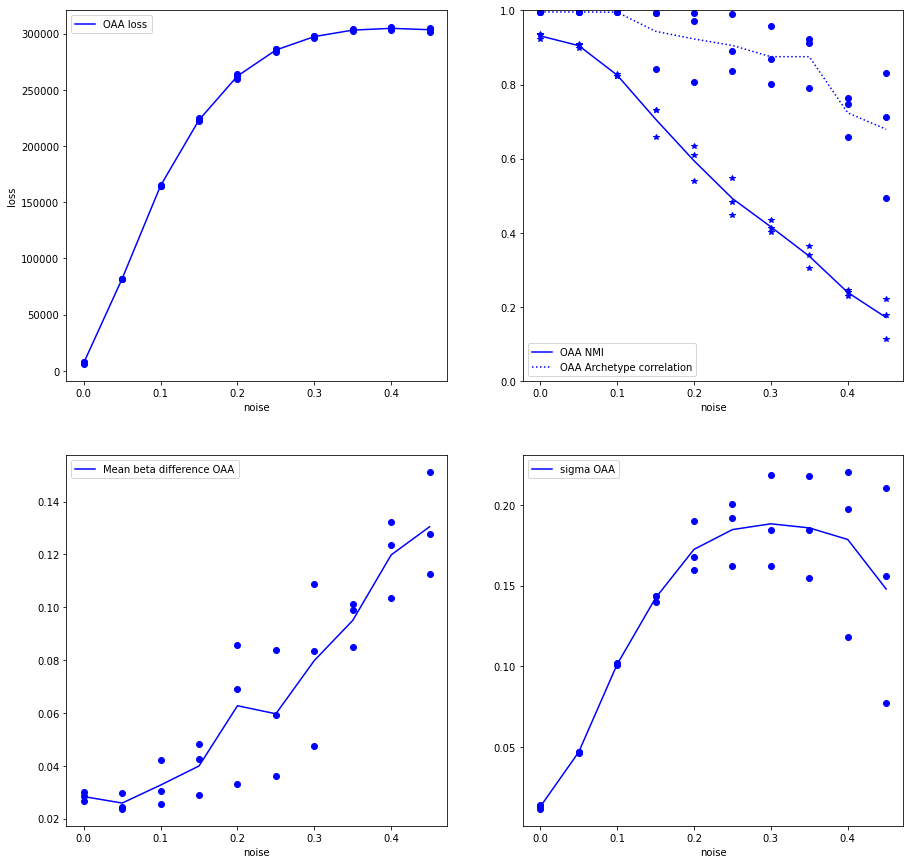

In [210]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(15,15))

loss_log_OAA.mean(1).plot(c="blue", ax=ax1, legend=True, ylabel="loss", xlabel="noise")

ax1.legend(["OAA loss"])

loss_log_OAA.plot(style="o", c="blue", ax=ax1, legend=False)

NMI_log_OAA.mean(1).plot(c="blue", ax=ax2, xlabel="noise")

A_correlation_OAA.mean(1).plot(style=":", c="blue", ax=ax2)


ax2.legend(["OAA NMI","OAA Archetype correlation"])

NMI_log_OAA.plot(style="*", c="blue", ax=ax2, ylim=(0, 1), legend=False)

A_correlation_OAA.plot(style="o", c="blue", ax=ax2, legend=False)


RBC_log_OAA.mean(1).plot(style="-", c="blue", ax=ax3, xlabel="noise")


RBC_log_OAA.plot(style="o", c="blue", ax=ax3, legend=False)

ax3.legend(["Mean beta difference OAA"])

OAA_noise.mean(1).plot(c="blue", ax=ax4, legend=True)

ax4.legend(["sigma OAA"])

OAA_noise.plot(style="o", c="blue", ax=ax4, legend=False, xlabel="noise")


plt.show()
